<a href="https://colab.research.google.com/github/ShyrleyFlor/Analisis_datos_energia_ASU/blob/main/TF_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Rutas de los archivos CSV en Google Drive
ruta_csv1 = '/content/drive/MyDrive/PYTHON_UNA/TF/SIN_2022.csv'
ruta_csv2 = '/content/drive/MyDrive/PYTHON_UNA/TF/Temp_Asu2022.csv'

# Lee los archivos CSV en DataFrames
df1 = pd.read_csv(ruta_csv1)
df2 = pd.read_csv(ruta_csv2)


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Fecha'] = pd.to_datetime(df2['Fecha'])

In [ ]:
print(df1['Date'].head())
print(df2['Fecha'].head())

0   2022-01-01 00:00:00
1   2022-01-01 01:00:00
2   2022-01-01 02:00:00
3   2022-01-01 03:00:00
4   2022-01-01 04:00:00
Name: Date, dtype: datetime64[ns]
0   2022-01-01 00:00:00
1   2022-01-01 03:00:00
2   2022-01-01 06:00:00
3   2022-01-01 09:00:00
4   2022-01-01 12:00:00
Name: Fecha, dtype: datetime64[ns]


In [ ]:
# Unión por la columna de fecha
df_union = pd.merge(df1, df2, left_on='Date', right_on='Fecha', how='inner')


In [ ]:
print(df_union.shape)

(2920, 6)


In [ ]:
# Eliminar la columna duplicada 'Date'
df_union = df_union.drop('Date', axis=1)

In [ ]:
df_union = df_union.dropna()

In [ ]:
# Guardar el resultado en un nuevo archivo CSV
ruta_resultado = '/content/drive/MyDrive/PYTHON_UNA/TF/resultado_union.csv'
df_union.to_csv(ruta_resultado, index=False)

In [ ]:
print(df_union.shape)

(2920, 5)


In [ ]:
df_union['Fecha'] = pd.to_datetime(df_union['Fecha'])

In [ ]:
# Extraer información de fecha
df_union['Hora'] = df_union['Fecha'].dt.hour
df_union['DiaSemana'] = df_union['Fecha'].dt.day_name()
df_union['Mes'] = df_union['Fecha'].dt.month_name()

In [ ]:
# Análisis de demanda por hora
demanda_por_hora = df_union.groupby('Hora')['SIN'].mean()

In [ ]:
# Análisis de demanda por día de la semana
demanda_por_dia_semana = df_union.groupby('DiaSemana')['SIN'].mean()

In [ ]:
# Análisis de demanda por hora y día
demanda_por_hora_dia = df_union.groupby(['DiaSemana', 'Hora'])['SIN'].mean().unstack()

In [ ]:
# Análisis de demanda por mes
demanda_por_mes = df_union.groupby('Mes')['SIN'].mean()

In [ ]:
print(df_union.shape)


(2920, 8)


In [ ]:
print(df_union.head())


    SIN  Unnamed: 0               Fecha  Temperatura    Humedad  Hora  \
0  2688           0 2022-01-01 00:00:00    29.853572  34.058802     0   
1  2522           1 2022-01-01 03:00:00    27.500426  36.419220     3   
2  2219           2 2022-01-01 06:00:00    24.551534  44.027163     6   
3  2376           3 2022-01-01 09:00:00    22.722984  57.339323     9   
4  2645           4 2022-01-01 12:00:00    32.654782  36.628217    12   

  DiaSemana      Mes  
0  Saturday  January  
1  Saturday  January  
2  Saturday  January  
3  Saturday  January  
4  Saturday  January  


In [ ]:
print(df_union['Hora'].unique())
print(df_union['DiaSemana'].unique())
print(df_union['Mes'].unique())


[ 0  3  6  9 12 15 18 21]
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


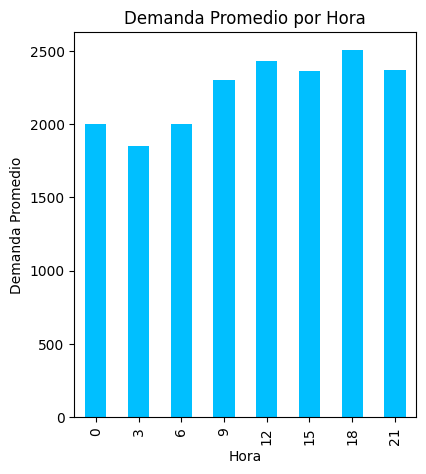

In [ ]:
# Visualización
plt.figure(figsize=(15, 5))
# Gráfico por hora
plt.subplot(1, 3, 1)
demanda_por_hora.plot(kind='bar', title='Demanda Promedio por Hora', color='deepskyblue')  # Cambia 'green' al color que prefieras
plt.xlabel('Hora')
plt.ylabel('Demanda Promedio')
plt.show()

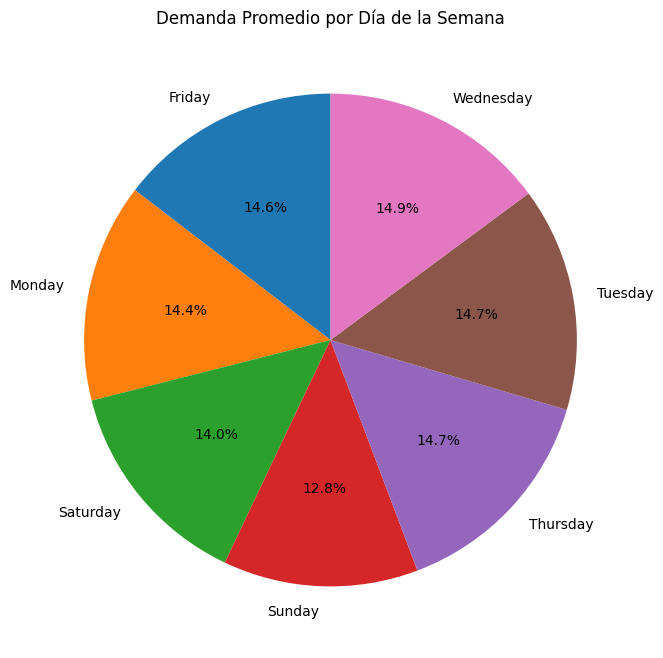

In [ ]:
# Gráfico por día de la semana
plt.figure(figsize=(8, 8))
plt.pie(demanda_por_dia_semana, labels=demanda_por_dia_semana.index, autopct='%1.1f%%', startangle=90)
plt.title('Demanda Promedio por Día de la Semana')
plt.show()

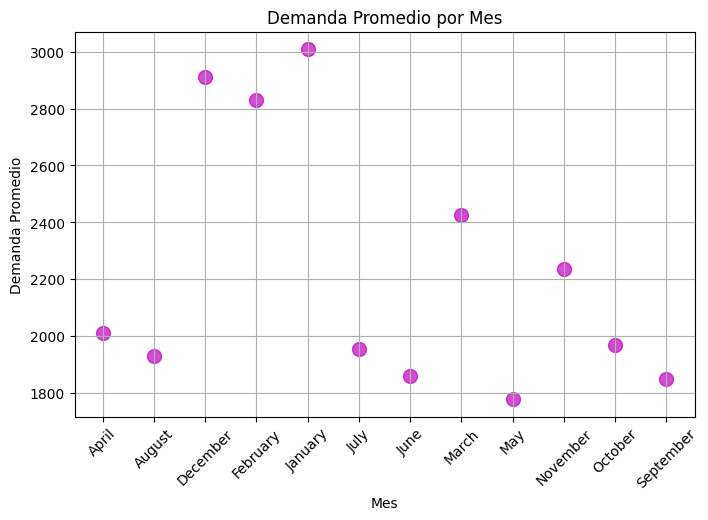

In [ ]:
# Gráfico por mes
plt.figure(figsize=(8, 5))
plt.scatter(demanda_por_mes.index, demanda_por_mes, s=100, c='m', alpha=0.7)
plt.title('Demanda Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Demanda Promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

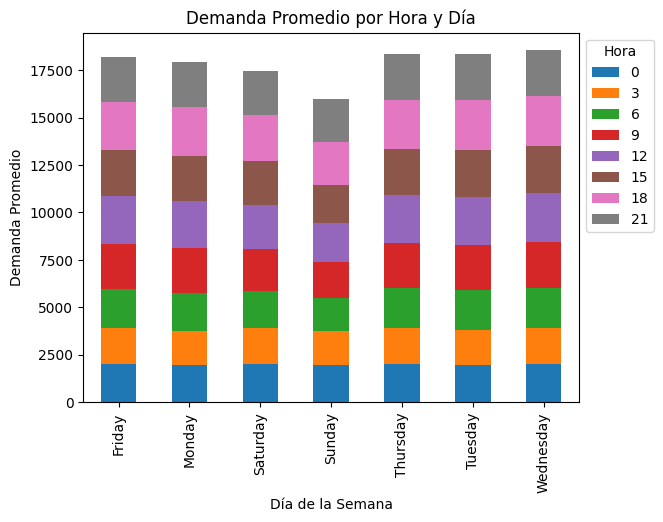

In [ ]:
# Crear un gráfico de barras apilado
demanda_por_hora_dia.plot(kind='bar', stacked=True)
plt.title('Demanda Promedio por Hora y Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Demanda Promedio')
plt.legend(title='Hora', bbox_to_anchor=(1, 1))
plt.show()